In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display


/home/ng/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
clientes=pd.read_csv('Datos/clients.csv')

segmento=pd.read_csv('Datos/channel_segmentation.csv')

sales_2022_semestre_1=pd.read_csv( 'Datos/sales_2022_semestre_1.csv')
sales_2022_semestre_2=pd.read_csv( 'Datos/sales_2022_semestre_2.csv')
sales_2023_semestre_1=pd.read_csv( 'Datos/sales_2023_semestre_1.csv')

clientes_con_promociones= pd.read_csv('Datos/coupons.csv')

blacklist=pd.read_csv('Datos/blacklist.csv')

datos=[sales_2022_semestre_1,sales_2022_semestre_2,sales_2023_semestre_1]

# Explicación del Código

En este documento, se describe el proceso de lectura de varios archivos CSV que contienen datos relevantes para el análisis de clientes y ventas. Los archivos se cargan en diferentes DataFrames de pandas para su posterior manipulación y análisis.

## Lectura de Archivos CSV

El primer paso consiste en cargar los datos desde archivos CSV ubicados en la carpeta `Datos`. Utilizamos la función `pd.read_csv` de la biblioteca pandas para leer cada archivo y almacenar su contenido en un DataFrame.

### Código:

```python
import pandas as pd

# Lectura de archivos CSV
clientes = pd.read_csv('Datos/clients.csv')
segmento = pd.read_csv('Datos/channel_segmentation.csv')
sales_2022_semestre_1 = pd.read_csv('Datos/sales_2022_semestre_1.csv')
sales_2022_semestre_2 = pd.read_csv('Datos/sales_2022_semestre_2.csv')
sales_2023_semestre_1 = pd.read_csv('Datos/sales_2023_semestre_1.csv')
clientes_con_promociones = pd.read_csv('Datos/coupons.csv')
blacklist = pd.read_csv('Datos/blacklist.csv')


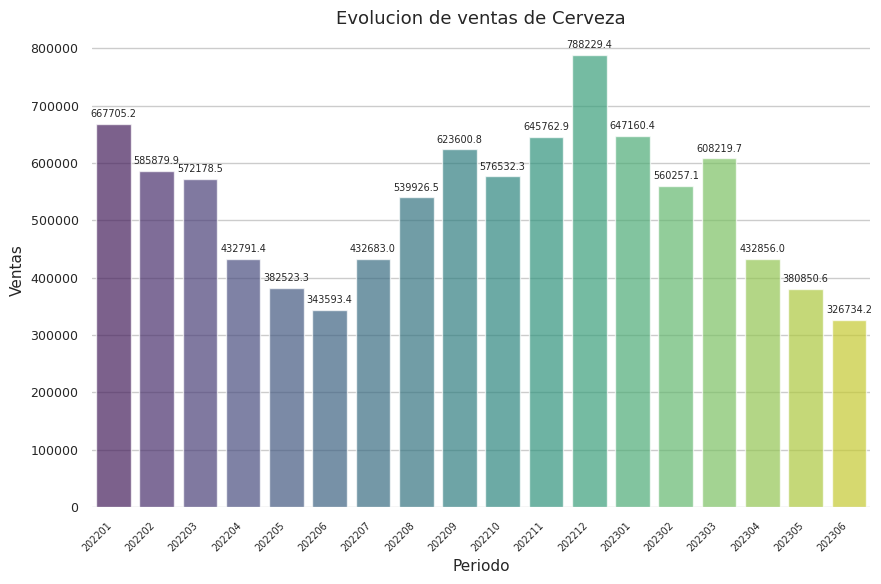

In [32]:
ventas_totales=pd.DataFrame(sales.groupby('yearmonth')['sales'].sum()).sort_values(by='yearmonth').reset_index()
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(9, 6))
barplot = sns.barplot(x='yearmonth', y='sales', data=ventas_totales, palette='viridis',alpha=0.7)

# Añadir etiquetas y título
plt.title('Evolucion de ventas de Cerveza', fontsize=13)
plt.xlabel('Periodo', fontsize=11)
plt.ylabel('Ventas', fontsize=11)

# Girar las etiquetas del eje x
plt.xticks(rotation=45, ha='right',fontsize=7)

plt.yticks(fontsize=9)

# Añadir etiquetas de datos en las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 7),  # Distancia del texto a la barra
                     textcoords = 'offset points',
                     fontsize=7)  # Tamaño de la fuente más pequeño

# Mejorar el diseño del gráfico
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [4]:
sales = pd.concat([sales_2022_semestre_1, sales_2022_semestre_2, sales_2023_semestre_1], ignore_index=True)
ventas=pd.DataFrame(sales.groupby(['yearmonth','brand'])['sales'].sum()).sort_values(by='yearmonth').reset_index()

# Función para actualizar el gráfico según la marca seleccionada
def update_graph(marca):
    plt.clf()  # Limpiar el gráfico anterior
    
    # Filtrar los datos para la marca seleccionada
    data_filtered = ventas[ventas['brand'] == marca]
    
    # Configurar el estilo
    sns.set(style="whitegrid")

    # Crear el gráfico
    plt.figure(figsize=(9, 6))
    barplot = sns.barplot(x='yearmonth', y='sales', data=data_filtered, palette='viridis', alpha=0.7)

    # Añadir etiquetas y título
    plt.title(f'Evolución de ventas de Cerveza - {marca}', fontsize=13)
    plt.xlabel('Periodo', fontsize=11)
    plt.ylabel('Ventas', fontsize=11)

    # Girar las etiquetas del eje x
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(fontsize=9)

    # Añadir etiquetas de datos en las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 7),  # Distancia del texto a la barra
                         textcoords='offset points',
                         fontsize=7)  # Tamaño de la fuente más pequeño

    # Mejorar el diseño del gráfico
    sns.despine(left=True, bottom=True)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Obtener la lista única de marcas
marcas = ventas['brand'].unique()

# Crear el widget de selección de marca
marca_widget = widgets.Dropdown(
    options=marcas,
    value=marcas[0],  # Valor por defecto
    description='Marca:'
)

# Asociar la función de actualización al cambio en el widget
output = widgets.interactive_output(update_graph, {'marca': marca_widget})

# Mostrar el widget y la salida del gráfico
display(widgets.HBox([marca_widget, output]))


### Descripción del Código

El código proporcionado realiza las siguientes tareas:

1. **Preparación de los Datos:**
   
   ```python
   sales = pd.concat([sales_2022_semestre_1, sales_2022_semestre_2, sales_2023_semestre_1], ignore_index=True)
   ventas = pd.DataFrame(sales.groupby(['yearmonth', 'brand'])['sales'].sum()).sort_values(by='yearmonth').reset_index()
   ```
   
   - **`sales = pd.concat([...], ignore_index=True)`**: Combina varios DataFrames (`sales_2022_semestre_1`, `sales_2022_semestre_2`, `sales_2023_semestre_1`) en uno solo (`sales`), ignorando los índices originales para tener un índice continuo.
   
   - **`ventas = pd.DataFrame([...])`**: Agrupa los datos combinados por mes (`yearmonth`) y marca (`brand`), sumando las ventas (`sales`) para cada combinación. Luego, se ordenan los resultados por mes (`yearmonth`) y se resetea el índice para obtener un DataFrame limpio (`ventas`) listo para la visualización.

2. **Función `update_graph`:**

   ```python
   def update_graph(marca):
       plt.clf()  # Limpiar el gráfico anterior
       
       # Filtrar los datos para la marca seleccionada
       data_filtered = ventas[ventas['brand'] == marca]
       
       # Configurar el estilo
       sns.set(style="whitegrid")
   
       # Crear el gráfico
       plt.figure(figsize=(9, 6))
       barplot = sns.barplot(x='yearmonth', y='sales', data=data_filtered, palette='viridis', alpha=0.7)
   
       # Añadir etiquetas y título
       plt.title(f'Evolución de ventas de Cerveza - {marca}', fontsize=13)
       plt.xlabel('Periodo', fontsize=11)
       plt.ylabel('Ventas', fontsize=11)
   
       # Girar las etiquetas del eje x
       plt.xticks(rotation=45, ha='right', fontsize=7)
       plt.yticks(fontsize=9)
   
       # Añadir etiquetas de datos en las barras
       for p in barplot.patches:
           barplot.annotate(format(p.get_height(), '.1f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 7),  # Distancia del texto a la barra
                            textcoords='offset points',
                            fontsize=7)  # Tamaño de la fuente más pequeño
   
       # Mejorar el diseño del gráfico
       sns.despine(left=True, bottom=True)
   
       # Mostrar el gráfico
       plt.tight_layout()
       plt.show()
   ```
   
   - **`update_graph(marca)`**: Esta función toma como argumento `marca`, que representa la marca de cerveza seleccionada por el usuario.
   
   - **`plt.clf()`**: Limpia cualquier gráfico previo para asegurar que se dibuje uno nuevo sin superposiciones.
   
   - **Filtrado de Datos**: Filtra el DataFrame `ventas` para obtener solo las filas donde la columna `brand` coincide con la `marca` seleccionada.
   
   - **Configuración del Gráfico**:
     - `sns.set(style="whitegrid")`: Configura el estilo de Seaborn para el gráfico.
     - `plt.figure(figsize=(9, 6))`: Define el tamaño del gráfico.
     - `sns.barplot(...)`: Crea un gráfico de barras usando Seaborn, donde `yearmonth` se representa en el eje x, `sales` en el eje y, y `data_filtered` contiene los datos filtrados para la marca seleccionada.
   
   - **Añadir Etiquetas y Título**: Configura el título del gráfico y etiquetas para los ejes x e y.
   
   - **Etiquetas de Datos**: Utiliza `annotate` para agregar etiquetas de datos en las barras del gráfico.
   
   - **Mejoras Estéticas**: `sns.despine()` elimina los bordes izquierdo y inferior del gráfico para mejorar la estética.
   
   - **Mostrar el Gráfico**: `plt.tight_layout()` asegura que todos los elementos del gráfico sean visibles correctamente, y `plt.show()` muestra el gráfico en el notebook.

3. **Widget Interactivo:**
   
   ### Obtener la lista única de marcas
   marcas = ventas['brand'].unique()
   
   ### Crear el widget de selección de marca
   marca_widget = widgets.Dropdown(
       options=marcas,
       value=marcas[0],  # Valor por defecto
       description='Marca:'
   )
   
   ### Asociar la función de actualización al cambio en el widget
   output = widgets.interactive_output(update_graph, {'marca': marca_widget})
   
   ### Mostrar el widget y la salida del gráfico
   display(widgets.HBox([marca_widget, output]))
   
   
   - **Creación del Widget**: `widgets.Dropdown` crea un menú desplegable (`Dropdown`) con opciones basadas en las marcas únicas presentes en `ventas`.
   
   - **Asociación de la Función `update_graph`**: `widgets.interactive_output` conecta dinámicamente el widget de selección de marca (`marca_widget`) con la función `update_graph`, de modo que cada vez que se selecciona una marca, se llama automáticamente a `update_graph` con el valor seleccionado como argumento.
   
   - **Mostrar el Widget y la Salida**: `display(widgets.HBox([...]))` muestra el widget de selección de marca y la salida interactiva del gráfico en una misma fila (`HBox`), permitiendo una interacción fácil y clara en el notebook.

Este código crea un entorno interactivo donde los usuarios pueden seleccionar una marca de cerveza y ver la evolución de las ventas representada en un gráfico de barras, adaptado dinámicamente según la selección realizada.

In [5]:
for i in datos:
    df=i
    df['yearmonth'] = df['yearmonth'].apply(str)
    df['year'] = df['yearmonth'].str[:4]
    df['mes'] = df['yearmonth'].str[4:]
    i=df

df=clientes_con_promociones 
df['yearmonth'] = df['yearmonth'].apply(str)
df['year'] = df['yearmonth'].str[:4]
df['mes'] = df['yearmonth'].str[4:]
clientes_con_promociones=df    

sales_2022_s1merged = pd.merge(sales_2022_semestre_1,clientes_con_promociones, on=['cliente_id','business', 'brand','yearmonth','year','mes'], how='left')
sales_2022_s2merged = pd.merge(sales_2022_semestre_2,clientes_con_promociones, on=['cliente_id','business', 'brand','yearmonth','year','mes'], how='left')
sales_2023_s1merged = pd.merge(sales_2023_semestre_1,clientes_con_promociones, on=['cliente_id','business', 'brand','yearmonth','year','mes'], how='left')

sales_2022_s1merged['sales_with_coupons'].fillna(0, inplace=True) 
sales_2022_s2merged['sales_with_coupons'].fillna(0, inplace=True)
sales_2023_s1merged['sales_with_coupons'].fillna(0, inplace=True) 



# Explicación del Código

En este documento, se describe el proceso de manipulación y fusión de datos de ventas con datos de promociones, y la limpieza de los datos resultantes. Este proceso incluye la transformación de columnas, la fusión de DataFrames y el manejo de valores nulos.

## Transformación de Columnas en los DataFrames de Ventas

Primero, recorremos la lista `datos`, que contiene los DataFrames de ventas de diferentes semestres, y transformamos la columna `yearmonth` en dos nuevas columnas: `year` y `mes`.

### Código:

```python
# Transformar la columna 'yearmonth' en 'year' y 'mes' para los DataFrames de ventas
for i in datos:
    df = i
    df['yearmonth'] = df['yearmonth'].apply(str)
    df['year'] = df['yearmonth'].str[:4]
    df['mes'] = df['yearmonth'].str[4:]
    i = df
```

### Descripción:

- **`yearmonth` a cadena**: Convertimos la columna `yearmonth` a una cadena de texto para facilitar la extracción de `year` y `mes`.
- **Extracción de `year` y `mes`**: Utilizamos el método `str` para extraer los primeros 4 caracteres como `year` y los siguientes caracteres como `mes`.

## Transformación de Columnas en el DataFrame de Promociones

Realizamos una transformación similar en el DataFrame `clientes_con_promociones`.

### Código:

```python
# Transformar la columna 'yearmonth' en 'year' y 'mes' para el DataFrame de promociones
df = clientes_con_promociones
df['yearmonth'] = df['yearmonth'].apply(str)
df['year'] = df['yearmonth'].str[:4]
df['mes'] = df['yearmonth'].str[4:]
clientes_con_promociones = df
```

### Descripción:

- **Transformaciones idénticas**: Aplicamos el mismo proceso de transformación que en los DataFrames de ventas para asegurar la consistencia en los formatos de las columnas.

## Fusión de DataFrames

Fusionamos los DataFrames de ventas con el DataFrame `clientes_con_promociones` para agregar información de promociones a los datos de ventas.

### Código:

```python
# Fusión de DataFrames de ventas con clientes con promociones
sales_2022_s1merged = pd.merge(sales_2022_semestre_1, clientes_con_promociones, on=['cliente_id', 'business', 'brand', 'yearmonth', 'year', 'mes'], how='left')
sales_2022_s2merged = pd.merge(sales_2022_semestre_2, clientes_con_promociones, on=['cliente_id', 'business', 'brand', 'yearmonth', 'year', 'mes'], how='left')
sales_2023_s1merged = pd.merge(sales_2023_semestre_1, clientes_con_promociones, on=['cliente_id', 'business', 'brand', 'yearmonth', 'year', 'mes'], how='left')
```

### Descripción:

- **Fusión (`merge`)**: Utilizamos `pd.merge` para combinar los DataFrames de ventas con `clientes_con_promociones` basado en las columnas `cliente_id`, `business`, `brand`, `yearmonth`, `year`, y `mes`.
- **Método `left join`**: Usamos `how='left'` para mantener todos los registros de las ventas, incluso si no tienen correspondencia en `clientes_con_promociones`.

## Manejo de Valores Nulos

Llenamos los valores nulos en la columna `sales_with_coupons` con 0 en los DataFrames resultantes de las fusiones.

### Código:

```python
# Llenar valores nulos en 'sales_with_coupons' con 0
sales_2022_s1merged['sales_with_coupons'].fillna(0, inplace=True)
sales_2022_s2merged['sales_with_coupons'].fillna(0, inplace=True)
sales_2023_s1merged['sales_with_coupons'].fillna(0, inplace=True)
```

### Descripción:

- **Llenar valores nulos**: Utilizamos `fillna(0, inplace=True)` para reemplazar los valores nulos en la columna `sales_with_coupons` con 0. Esto asegura que las ventas sin cupones se registren como 0 en lugar de nulos.

## Conclusión

Este código realiza varias transformaciones y fusiones esenciales para preparar los datos de ventas y promociones para análisis posteriores. Al transformar y fusionar los DataFrames, y manejar los valores nulos, garantizamos que los datos estén en un formato consistente y listo para el análisis.




In [6]:
sales_2022_s1merged['promocion']=np.where(sales_2022_s1merged['sales_with_coupons']>5,1,0)
sales_2023_s1merged['promocion']=np.where(sales_2023_s1merged['sales_with_coupons']>5,1,0)

In [7]:
sales_merged_s1= pd.merge(sales_2022_s1merged, sales_2023_s1merged, on=['cliente_id','business', 'brand','mes'], how='inner', suffixes=('', '_next'))


In [8]:
clientes_merged_df = pd.merge(clientes, segmento, on='channel_id', how='inner')

In [9]:
df=clientes_merged_df
clientes_merged_filtrado= df[~df['cliente_id'].isin(blacklist['cliente_id'])]

In [10]:
clientes_merged_df = pd.merge(clientes_merged_filtrado, sales_merged_s1, on='cliente_id', how='inner')
clientes_merged_df['target_de_estudio']=np.where((clientes_merged_df['promocion']==0) & (clientes_merged_df['promocion_next']==1),1,0)
clientes_merged_df['control']=np.where((clientes_merged_df['promocion']==0) & (clientes_merged_df['promocion_next']==0),1,0)

target = clientes_merged_df[clientes_merged_df['target_de_estudio']==1]

control=clientes_merged_df[clientes_merged_df['control']==1]

rubros = ['AUTOSERVICIOS', 'KIOSCOS', 'TRADICIONAL']

target_fit=target[(target['sales']>0.1) & (target['channel_segmentation'].isin(rubros))]
control_fit=control[(control['sales']>0.1) & (control['channel_segmentation'].isin(rubros))]

target_fit['proporcion']=(target_fit['sales_next']-target_fit['sales'])/target_fit['sales']
control_fit['proporcion']=(control_fit['sales_next']-control_fit['sales'])/control_fit['sales']

/tmp/ipykernel_3859/3750928818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_fit['proporcion']=(target_fit['sales_next']-target_fit['sales'])/target_fit['sales']
/tmp/ipykernel_3859/3750928818.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_fit['proporcion']=(control_fit['sales_next']-control_fit['sales'])/control_fit['sales']



# Explicación del Código

En este documento, se describe un proceso complejo de análisis de datos, que incluye la creación de variables, la fusión de DataFrames y la identificación de grupos de estudio y control. Este proceso es crucial para analizar el impacto de las promociones en las ventas de los clientes.

## Creación de la Variable de Promoción

Primero, se crea una nueva columna `promocion` en los DataFrames de ventas de 2022 y 2023 que indica si las ventas con cupones superan un umbral específico (en este caso, 5).

### Código:

```python
import numpy as np

# Crear columna 'promocion' para indicar si 'sales_with_coupons' > 5
sales_2022_s1merged['promocion'] = np.where(sales_2022_s1merged['sales_with_coupons'] > 5, 1, 0)
sales_2023_s1merged['promocion'] = np.where(sales_2023_s1merged['sales_with_coupons'] > 5, 1, 0)
```

### Descripción:

- **Condición `np.where`**: Si `sales_with_coupons` es mayor a 5, se asigna 1 (promoción); de lo contrario, se asigna 0.

## Fusión de DataFrames de Ventas

Fusionamos los DataFrames de ventas de 2022 y 2023, manteniendo sólo los registros que coinciden en ambas tablas (`inner join`).

### Código:

```python
# Fusionar DataFrames de ventas de 2022 y 2023
sales_merged_s1 = pd.merge(sales_2022_s1merged, sales_2023_s1merged, on=['cliente_id', 'business', 'brand', 'mes'], how='inner', suffixes=('', '_next'))
```

### Descripción:

- **Fusión `inner join`**: Mantiene sólo los registros que están presentes en ambos DataFrames.
- **Sufijos**: Se añaden sufijos para diferenciar las columnas del DataFrame de 2023 (`_next`).

## Fusión de Clientes con Segmentos de Canal

Fusionamos los DataFrames de clientes y segmentos de canal.

### Código:

```python
# Fusionar DataFrames de clientes y segmentos de canal
clientes_merged_df = pd.merge(clientes, segmento, on='channel_id', how='inner')
```

### Descripción:

- **Fusión `inner join`**: Mantiene sólo los registros que están presentes en ambos DataFrames.

## Filtrado de Clientes en la Lista Negra

Filtramos los clientes que están en la lista negra (`blacklist`).

### Código:

```python
# Filtrar clientes que no están en la lista negra
df = clientes_merged_df
clientes_merged_filtrado = df[~df['cliente_id'].isin(blacklist['cliente_id'])]
```

### Descripción:

- **Filtrado**: Excluimos los `cliente_id` que están en la lista negra usando `isin` y `~` para la negación.

## Fusión de Clientes con Ventas

Fusionamos los DataFrames de clientes filtrados con las ventas fusionadas de 2022 y 2023.

### Código:

```python
# Fusionar clientes filtrados con ventas fusionadas
clientes_merged_df = pd.merge(clientes_merged_filtrado, sales_merged_s1, on='cliente_id', how='inner')
```

### Descripción:

- **Fusión `inner join`**: Mantiene sólo los registros que están presentes en ambos DataFrames.

## Creación de Variables de Estudio y Control

Creamos nuevas columnas `target_de_estudio` y `control` para identificar los grupos de estudio y control.

### Código:

```python
# Crear columna 'target_de_estudio'
clientes_merged_df['target_de_estudio'] = np.where((clientes_merged_df['promocion'] == 0) & (clientes_merged_df['promocion_next'] == 1), 1, 0)

# Crear columna 'control'
clientes_merged_df['control'] = np.where((clientes_merged_df['promocion'] == 0) & (clientes_merged_df['promocion_next'] == 0), 1, 0)
```

### Descripción:

- **Condición `np.where`**: `target_de_estudio` se asigna 1 si `promocion` es 0 y `promocion_next` es 1; `control` se asigna 1 si `promocion` y `promocion_next` son 0.

## Identificación de Grupos de Estudio y Control

Filtramos los DataFrames para obtener los grupos de estudio y control.

### Código:

```python
# Filtrar grupos de estudio y control
target = clientes_merged_df[clientes_merged_df['target_de_estudio'] == 1]
control = clientes_merged_df[clientes_merged_df['control'] == 1]
```

### Descripción:

- **Filtrado**: Seleccionamos los registros donde `target_de_estudio` es 1 para el grupo de estudio y `control` es 1 para el grupo de control.

## Filtrado Adicional por Segmentos de Canal y Ventas

Filtramos adicionalmente los grupos de estudio y control por segmentos de canal específicos y ventas mayores a 0.1.

### Código:

```python
# Definir rubros específicos
rubros = ['AUTOSERVICIOS', 'KIOSCOS', 'TRADICIONAL']

# Filtrar grupos de estudio y control por ventas y segmentos de canal
target_fit = target[(target['sales'] > 0.1) & (target['channel_segmentation'].isin(rubros))]
control_fit = control[(control['sales'] > 0.1) & (control['channel_segmentation'].isin(rubros))]
```

### Descripción:

- **Filtrado**: Seleccionamos los registros con `sales` mayores a 0.1 y `channel_segmentation` en los rubros definidos.

## Cálculo de la Proporción de Cambio en Ventas

Calculamos la proporción de cambio en ventas entre 2022 y 2023 para los grupos de estudio y control.

### Código:

```python
# Calcular proporción de cambio en ventas
target_fit['proporcion'] = (target_fit['sales_next'] - target_fit['sales']) / target_fit['sales']
control_fit['proporcion'] = (control_fit['sales_next'] - control_fit['sales']) / control_fit['sales']
```

### Descripción:

- **Cálculo de Proporción**: La proporción se calcula como el cambio en ventas entre 2023 y 2022 dividido por las ventas de 2022.

## Conclusión

Este código realiza un análisis detallado de los datos de ventas y promociones, identificando y comparando grupos de estudio y control. Las transformaciones y fusiones de DataFrames aseguran que los datos estén en un formato adecuado para el análisis, permitiendo la evaluación del impacto de las promociones en las ventas.




In [11]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = target_fit['proporcion'].quantile(0.25)
Q3 = target_fit['proporcion'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
target_fit_sin_outliers = target_fit[(target_fit['proporcion'] >= lower_bound) & (target_fit['proporcion'] <= upper_bound)]


In [12]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = control_fit['proporcion'].quantile(0.25)
Q3 = control_fit['proporcion'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
control_fit_sin_outliers = control_fit[(control_fit['proporcion'] >= lower_bound) & (control_fit['proporcion'] <= upper_bound)]



# Explicación del Código

En este documento, se describe el proceso de identificación y eliminación de outliers en los grupos de estudio y control, utilizando el rango intercuartílico (IQR). Este proceso es esencial para asegurar que el análisis no esté influenciado por valores atípicos extremos.

## Identificación y Eliminación de Outliers

### Para el Grupo de Estudio (`target_fit`)

Primero, calculamos el primer cuartil (Q1) y el tercer cuartil (Q3) de la variable `proporcion`, que representa el cambio proporcional en ventas. A partir de estos valores, calculamos el rango intercuartílico (IQR) y definimos los límites para identificar outliers.

### Código:

```python
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil) para el grupo de estudio
Q1 = target_fit['proporcion'].quantile(0.25)
Q3 = target_fit['proporcion'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
target_fit_sin_outliers = target_fit[(target_fit['proporcion'] >= lower_bound) & (target_fit['proporcion'] <= upper_bound)]
```

### Descripción:

- **Cálculo de Q1 y Q3**: Utilizamos el método `quantile` para calcular el primer y tercer cuartil de la columna `proporcion`.
- **Cálculo del IQR**: El rango intercuartílico se calcula como la diferencia entre Q3 y Q1.
- **Definición de Límites**: Los límites inferior y superior para identificar outliers se definen como \( Q1 - 1.5 \times IQR \) y \( Q3 + 1.5 \times IQR \), respectivamente.
- **Filtrado de Outliers**: Filtramos el DataFrame para mantener solo los valores de `proporcion` que están dentro de los límites definidos.

### Para el Grupo de Control (`control_fit`)

Repetimos el mismo proceso para el grupo de control.

### Código:

```python
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil) para el grupo de control
Q1 = control_fit['proporcion'].quantile(0.25)
Q3 = control_fit['proporcion'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
control_fit_sin_outliers = control_fit[(control_fit['proporcion'] >= lower_bound) & (control_fit['proporcion'] <= upper_bound)]
```

### Descripción:

- **Proceso Identico**: Se siguen los mismos pasos de cálculo y filtrado que en el grupo de estudio, adaptados al DataFrame `control_fit`.

## Conclusión

Este código calcula los cuartiles y el rango intercuartílico para la variable `proporcion` en los grupos de estudio y control, y utiliza estos valores para definir y eliminar outliers. Este paso es crucial para asegurar que los análisis posteriores no se vean sesgados por valores atípicos extremos, proporcionando así resultados más precisos y fiables.




In [13]:
# Agrupar por las columnas especificadas
grouped = target_fit_sin_outliers.groupby(['channel_segmentation', 'brand', 'mes'])

# Crear un diccionario para almacenar los DataFrames separados
dataframes_target = {}

# Iterar sobre los grupos y almacenar cada grupo en un DataFrame separado
for name, group in grouped:
    dataframes_target[name] = group.reset_index(drop=True)


In [14]:
# Agrupar por las columnas especificadas
grouped = control_fit_sin_outliers.groupby(['channel_segmentation', 'brand', 'mes'])

# Crear un diccionario para almacenar los DataFrames separados
dataframes_control = {}

# Iterar sobre los grupos y almacenar cada grupo en un DataFrame separado
for name, group in grouped:
    dataframes_control[name] = group.reset_index(drop=True)


In [15]:
# Crear un diccionario para almacenar los deciles
deciles_dict = {}

# Calcular los deciles para cada DataFrame en el primer diccionario
for key, df in dataframes_target.items():
    deciles_dict[key] = df['sales'].quantile([0.1 * i for i in range(1, 10)]).values

    # Crear un diccionario para almacenar las muestras del segundo diccionario
sampled_dict = {}

# Tomar una muestra de 10 casos para cada decil del segundo diccionario
for key, df in dataframes_control.items():
    if key in deciles_dict:
        datos=dataframes_target[key]
        deciles = deciles_dict[key]
        samples = []
        for i in range(len(deciles)):
            if i == 0:
                mask = (df['sales'] <= deciles[i]) & (df['region'].isin(datos['region'].unique()))
            else:
                mask = (df['sales'] > deciles[i-1]) & (df['sales'] <= deciles[i]) & (df['region'].isin(datos['region'].unique()))
            
            decil_sample = df[mask].sample(n=10, replace=True, random_state=1) if not df[mask].empty else pd.DataFrame()
            samples.append(decil_sample)
        
        # Concatenar todas las muestras para este key
        sampled_df = pd.concat(samples).reset_index(drop=True)
        sampled_dict[key] = sampled_df



# Explicación del Código

En este documento, se describe el proceso de agrupación de DataFrames, cálculo de deciles y muestreo de datos en Python. Este proceso es esencial para preparar los datos para análisis posteriores.

## Agrupación de DataFrames

### Agrupación del Grupo de Estudio (`target_fit_sin_outliers`)

Primero, agrupamos los datos del grupo de estudio por las columnas `channel_segmentation`, `brand` y `mes`.

### Código:

```python
# Agrupar por las columnas especificadas
grouped = target_fit_sin_outliers.groupby(['channel_segmentation', 'brand', 'mes'])

# Crear un diccionario para almacenar los DataFrames separados
dataframes_target = {}

# Iterar sobre los grupos y almacenar cada grupo en un DataFrame separado
for name, group in grouped:
    dataframes_target[name] = group.reset_index(drop=True)
```

### Descripción:

- **Agrupación**: Utilizamos el método `groupby` de pandas para agrupar los datos por las columnas especificadas.
- **Almacenamiento**: Creamos un diccionario `dataframes_target` donde cada grupo se almacena como un DataFrame separado, con las llaves del diccionario siendo las combinaciones de valores de las columnas agrupadas.

### Agrupación del Grupo de Control (`control_fit_sin_outliers`)

Repetimos el mismo proceso para el grupo de control.

### Código:

```python
# Agrupar por las columnas especificadas
grouped = control_fit_sin_outliers.groupby(['channel_segmentation', 'brand', 'mes'])

# Crear un diccionario para almacenar los DataFrames separados
dataframes_control = {}

# Iterar sobre los grupos y almacenar cada grupo en un DataFrame separado
for name, group in grouped:
    dataframes_control[name] = group.reset_index(drop=True)
```

### Descripción:

- **Proceso Identico**: Se siguen los mismos pasos de agrupación y almacenamiento que en el grupo de estudio, adaptados al DataFrame `control_fit_sin_outliers`.

## Cálculo de Deciles

Calculamos los deciles de la columna `sales` para cada DataFrame en el diccionario del grupo de estudio.

### Código:

```python
# Crear un diccionario para almacenar los deciles
deciles_dict = {}

# Calcular los deciles para cada DataFrame en el primer diccionario
for key, df in dataframes_target.items():
    deciles_dict[key] = df['sales'].quantile([0.1 * i for i in range(1, 10)]).values
```

### Descripción:

- **Diccionario de Deciles**: Creamos `deciles_dict` para almacenar los deciles calculados.
- **Cálculo de Deciles**: Utilizamos el método `quantile` para calcular los deciles de la columna `sales` para cada DataFrame en `dataframes_target`.

## Muestreo Basado en Deciles

Tomamos muestras de 10 casos para cada decil del diccionario del grupo de control basado en los deciles calculados del grupo de estudio.

### Código:

```python
# Crear un diccionario para almacenar las muestras del segundo diccionario
sampled_dict = {}

# Tomar una muestra de 10 casos para cada decil del segundo diccionario
for key, df in dataframes_control.items():
    if key in deciles_dict:
        datos = dataframes_target[key]
        deciles = deciles_dict[key]
        samples = []
        for i in range(len(deciles)):
            if i == 0:
                mask = (df['sales'] <= deciles[i]) & (df['region'].isin(datos['region'].unique()))
            else:
                mask = (df['sales'] > deciles[i-1]) & (df['sales'] <= deciles[i]) & (df['region'].isin(datos['region'].unique()))
            
            decil_sample = df[mask].sample(n=10, replace=True, random_state=1) if not df[mask].empty else pd.DataFrame()
            samples.append(decil_sample)
        
        # Concatenar todas las muestras para este key
        sampled_df = pd.concat(samples).reset_index(drop=True)
        sampled_dict[key] = sampled_df
```

### Descripción:

- **Diccionario de Muestras**: Creamos `sampled_dict` para almacenar las muestras seleccionadas.
- **Condición de Muestreo**: Para cada key en `dataframes_control` que también está en `deciles_dict`, filtramos las filas de acuerdo a los deciles calculados y tomamos muestras de 10 casos para cada decil.
- **Concatenación de Muestras**: Concatenamos las muestras de cada decil y las almacenamos en `sampled_dict`.

## Conclusión

Este código realiza la agrupación de DataFrames por columnas específicas, calcula los deciles de ventas y toma muestras de datos basadas en estos deciles. Este proceso prepara los datos para análisis posteriores, asegurando que cada segmento de datos se trate de manera adecuada y que las muestras sean representativas.





In [16]:
promedios_por_region_dict = {}

# Calcular los promedios de 'proporcion' por región para cada DataFrame en el segundo diccionario
for key, df in sampled_dict.items():
    promedios_por_region = df.groupby('region')['proporcion'].mean().to_dict()
    promedios_por_region_dict[key] = promedios_por_region

# Mostrar los promedios por región
#for key, promedios in promedios_por_region_dict.items():
   # print(f'\nPromedios de proporcion por región para {key}: {promedios}')

# Añadir una nueva columna en el primer diccionario con los promedios de proporcion por región
for key, df in dataframes_target.items():
    if key in promedios_por_region_dict:
        df['promedio_proporcion_region'] = df['region'].map(promedios_por_region_dict[key])


In [17]:
for key, df in dataframes_target.items():
    df['lifts'] = df['proporcion']-df['promedio_proporcion_region']



# Explicación del Código

En este documento, se describe el proceso de cálculo de los promedios de la variable `proporcion` por región, y la adición de una nueva columna que representa el promedio por región en los DataFrames del primer diccionario. Además, se calcula y añade una nueva columna que representa el lift, que es una medida del incremento porcentual en ventas generado por las campañas de marketing.

## Calcular Promedios de `proporcion` por Región

### Paso 1: Calcular los Promedios de `proporcion` por Región para cada DataFrame en el Segundo Diccionario (`sampled_dict`)

Primero, calculamos los promedios de `proporcion` por región para cada DataFrame en el segundo diccionario y almacenamos estos promedios en un nuevo diccionario.

### Código:

```python
promedios_por_region_dict = {}

# Calcular los promedios de 'proporcion' por región para cada DataFrame en el segundo diccionario
for key, df in sampled_dict.items():
    promedios_por_region = df.groupby('region')['proporcion'].mean().to_dict()
    promedios_por_region_dict[key] = promedios_por_region

# Mostrar los promedios por región (opcional)
# for key, promedios in promedios_por_region_dict.items():
#     print(f'\nPromedios de proporcion por región para {key}: {promedios}')
```

### Descripción:

- **Diccionario de Promedios**: Creamos `promedios_por_region_dict` para almacenar los promedios calculados.
- **Cálculo de Promedios**: Utilizamos el método `groupby` y `mean` de pandas para calcular los promedios de `proporcion` por región para cada DataFrame en `sampled_dict`.
- **Almacenamiento de Resultados**: Los promedios calculados se almacenan en `promedios_por_region_dict` con las keys correspondientes.

## Añadir Promedios de `proporcion` por Región en el Primer Diccionario (`dataframes_target`)

### Paso 2: Añadir una Nueva Columna en el Primer Diccionario con los Promedios de `proporcion` por Región

Para cada DataFrame en el primer diccionario, añadimos una nueva columna `promedio_proporcion_region` que contiene el promedio de `proporcion` por región.

### Código:

```python
# Añadir una nueva columna en el primer diccionario con los promedios de proporcion por región
for key, df in dataframes_target.items():
    if key in promedios_por_region_dict:
        df['promedio_proporcion_region'] = df['region'].map(promedios_por_region_dict[key])
```

### Descripción:

- **Añadir Columna de Promedio**: Utilizamos el método `map` para añadir una nueva columna `promedio_proporcion_region` que contiene los promedios de `proporcion` por región, obtenidos del diccionario `promedios_por_region_dict`.

## Calcular y Añadir la Columna `lifts`

### Paso 3: Calcular y Añadir la Columna `lifts` en el Primer Diccionario

Calculamos la columna `lifts` que representa el incremento porcentual en ventas generado por las campañas de marketing comparado con el promedio por región.

### Código:

```python
# El lift se interpreta como: el % de incremento de ventas generado por haber efectuado alguna de estas campañas de marketing en comparación con un escenario donde no se hubiera efectuado ninguna.
for key, df in dataframes_target.items():
    df['lifts'] = df['proporcion'] - df['promedio_proporcion_region']
```

### Descripción:

- **Cálculo del Lift**: La columna `lifts` se calcula como la diferencia entre `proporcion` y `promedio_proporcion_region`.
- **Interpretación del Lift**: El lift se interpreta como el porcentaje de incremento en ventas generado por las campañas de marketing en comparación con un escenario donde no se hubiera efectuado ninguna campaña.

## Conclusión

Este código calcula los promedios de `proporcion` por región para cada DataFrame en el segundo diccionario y añade estos promedios como una nueva columna en los DataFrames del primer diccionario. Luego, se calcula y añade la columna `lifts`, que mide el incremento porcentual en ventas debido a las campañas de marketing. Este proceso es crucial para analizar el impacto de las campañas de marketing de manera detallada y segmentada.




In [18]:
# Filtrar items cuyo primer elemento de la tupla es 'AUTOSERVICIOS'
filtered_by_first = {k: v for k, v in dataframes_target.items() if k[0] == 'AUTOSERVICIOS' and k[1]=='andes_origen'}

#filtered_by_first


In [19]:
from scipy.stats import wilcoxon

def wilcoxon_test(df, column_name):
    """
    Realiza el test de Wilcoxon para una columna específica de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas que contiene los datos.
    - column_name: Nombre de la columna sobre la cual se realizará el test.

    Retorna:
    - 1 si se rechaza la hipótesis nula (la media es mayor que cero).
    - 0 si no se puede rechazar la hipótesis nula.
    """
    # Obtener los datos de la columna
    data = df[column_name].values
    
    # Realizar el test de Wilcoxon unilateral para muestras independientes
    stat, p_value = wilcoxon(data, alternative='greater')
    
    # Interpretar el resultado
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        return 1  # Se rechaza la hipótesis nula
    else:
        return 0  # No se rechaza la hipótesis nula



Este código implementa una función llamada `wilcoxon_test` que realiza el test de Wilcoxon para una columna específica de un DataFrame de pandas. 

1. **Importación de la función `wilcoxon` desde `scipy.stats`**:
   ```python
   from scipy.stats import wilcoxon
   ```
   Esto importa la función `wilcoxon` del módulo `scipy.stats`, que se utiliza para realizar el test de Wilcoxon.

2. **Definición de la función `wilcoxon_test`**:
   ```python
   def wilcoxon_test(df, column_name):
       """
       Realiza el test de Wilcoxon para una columna específica de un DataFrame.

       Parámetros:
       - df: DataFrame de pandas que contiene los datos.
       - column_name: Nombre de la columna sobre la cual se realizará el test.

       Retorna:
       - 1 si se rechaza la hipótesis nula (la media es mayor que cero).
       - 0 si no se puede rechazar la hipótesis nula.
       """
   ```
   - **Descripción y parámetros**: La función está documentada usando un docstring que explica su propósito, los parámetros que toma y lo que retorna. Toma como entrada un DataFrame `df` que contiene los datos y el nombre de la columna `column_name` sobre la cual se realizará el test.

3. **Obtención de los datos de la columna**:
   ```python
       # Obtener los datos de la columna
       data = df[column_name].values
   ```
   Aquí se extraen los valores de la columna especificada (`column_name`) del DataFrame `df` y se almacenan en la variable `data`. Estos datos se usarán como entrada para el test de Wilcoxon.

4. **Ejecución del test de Wilcoxon**:
   ```python
       # Realizar el test de Wilcoxon unilateral para muestras independientes
       stat, p_value = wilcoxon(data, alternative='greater')
   ```
   - **`wilcoxon(data, alternative='greater')`**: Esta línea ejecuta el test de Wilcoxon sobre los datos `data`. El parámetro `alternative='greater'` especifica que se está probando la hipótesis alternativa de que la media de la población subyacente es mayor que cero. El resultado del test (`stat`) y el valor p (`p_value`) se asignan a las variables correspondientes.

5. **Interpretación del resultado**:
   ```python
       # Interpretar el resultado
       alpha = 0.05  # Nivel de significancia
       if p_value < alpha:
           return 1  # Se rechaza la hipótesis nula
       else:
           return 0  # No se rechaza la hipótesis nula
   ```
   - Se define `alpha` como el nivel de significancia, comúnmente establecido en 0.05.
   - Se compara el valor p (`p_value`) obtenido del test con `alpha`.
   - Si `p_value` es menor que `alpha`, se rechaza la hipótesis nula (que en este caso sería que la media de la columna es mayor que cero) y la función retorna `1`.
   - Si `p_value` es mayor o igual que `alpha`, no se puede rechazar la hipótesis nula y la función retorna `0`.

En resumen, esta función `wilcoxon_test` utiliza el test de Wilcoxon para evaluar si la media de una columna específica de un DataFrame es mayor que cero. Retorna `1` si se rechaza la hipótesis nula (media mayor que cero), o `0` si no se puede rechazar la hipótesis nula.

In [20]:
#Ejemplo de la función wilcoxon_test
dft=dataframes_target[('AUTOSERVICIOS', 'andes_origen', '01')]
wilcoxon_test(dft,'lifts')

1

In [21]:
wilcoxon_test_lifts={}

for key, df in dataframes_target.items():
    wilcoxon_test_lifts[key]=wilcoxon_test(df,'lifts')



In [22]:
# Lista para almacenar los datos
data = []

# Recorrer el diccionario y crear las tuplas para cada fila
for key, value in wilcoxon_test_lifts.items():
    rubro, brand, mes = key
    l=dataframes_target[key]['lifts'].mean()
    data.append((rubro, brand, mes, value,l))

# Crear el DataFrame
df = pd.DataFrame(data, columns=['rubro', 'brand', 'mes', 'campaña_exitosa','lifts_promedio'])
df

,rubro,brand,mes,campaña_exitosa,lifts_promedio
0,AUTOSERVICIOS,andes_origen,01,1,0.420419
1,AUTOSERVICIOS,andes_origen,02,1,0.673224
2,AUTOSERVICIOS,andes_origen,03,1,0.590717
3,AUTOSERVICIOS,andes_origen,04,1,0.558816
4,AUTOSERVICIOS,andes_origen,05,1,0.398376
...,...,...,...,...,...
123,TRADICIONAL,stella_artois,02,1,0.638055
124,TRADICIONAL,stella_artois,03,1,0.915053
125,TRADICIONAL,stella_artois,04,1,0.870266
126,TRADICIONAL,stella_artois,05,0,0.052732


In [23]:
df.campaña_exitosa.value_counts()

1    66
0    62
Name: campaña_exitosa, dtype: int64

Este código realiza lo siguiente:

1. **Realización del test de Wilcoxon para cada grupo en `dataframes_target`**:
   ```python
   wilcoxon_test_lifts = {}

   for key, df in dataframes_target.items():
       wilcoxon_test_lifts[key] = wilcoxon_test(df, 'lifts')
   ```
   - Itera sobre cada elemento (`key, df`) en el diccionario `dataframes_target`.
   - Para cada `df` (que representa un DataFrame agrupado por una combinación de rubro, marca y mes), se aplica la función `wilcoxon_test` para la columna 'lifts' y se guarda el resultado en `wilcoxon_test_lifts` usando `key` como clave.

2. **Construcción de una lista de tuplas para crear el DataFrame**:
   ```python
   # Lista para almacenar los datos
   data = []

   # Recorrer el diccionario y crear las tuplas para cada fila
   for key, value in wilcoxon_test_lifts.items():
       rubro, brand, mes = key
       data.append((rubro, brand, mes, value))
   ```
   - Se inicializa una lista vacía `data` para almacenar los datos del DataFrame final.
   - Itera sobre `wilcoxon_test_lifts` y desempaqueta `key` en `rubro, brand, mes`.
   - Para cada entrada en `wilcoxon_test_lifts`, se agrega una tupla `(rubro, brand, mes, value)` a la lista `data`, donde `value` es el resultado del test de Wilcoxon (1 si se rechaza la hipótesis nula, 0 si no).

3. **Creación del DataFrame final**:
   ```python
   # Crear el DataFrame
   df = pd.DataFrame(data, columns=['rubro', 'brand', 'mes', 'campaña_exitosa'])
   ```
   - Se crea un DataFrame `df` utilizando la lista `data`.
   - Las columnas del DataFrame se especifican como `['rubro', 'brand', 'mes', 'campaña_exitosa']`.

4. **Conteo de valores en la columna `campaña_exitosa`**:
   ```python
   df.campaña_exitosa.value_counts()
   ```
   - Utiliza el método `value_counts()` en la columna `campaña_exitosa` del DataFrame `df`.
   - Esto cuenta cuántas veces aparece cada valor en la columna `campaña_exitosa` (en este caso, 0 y 1).

El código genera un DataFrame (`df`) que resume los resultados del test de Wilcoxon para cada combinación de rubro, marca y mes en `dataframes_target`, indicando si la campaña fue exitosa (1) o no (0) según el resultado del test. Finalmente, muestra el conteo de los valores en la columna `campaña_exitosa` para evaluar la distribución de los resultados.

In [38]:
#Guardamos la tabla con los lifts en un archivo csv
#df.to_csv('lifts_tabla.csv', index=False)

In [28]:
# Función para actualizar el gráfico según la marca y rubro 
def update_graph(marca,rubro):
    plt.clf()  # Limpiar el gráfico anterior
    
    # Filtrar los datos para la marca y rubro 
    data_filtered = df[(df['brand'] == marca) & (df['rubro'] == rubro)]
    
    # Configurar el estilo
    sns.set(style="whitegrid")

    # Crear el gráfico
    plt.figure(figsize=(9, 6))
    barplot = sns.barplot(x='mes', y='lifts_promedio', data=data_filtered, palette='viridis', alpha=0.7)

    # Añadir etiquetas y título
    plt.title(f'Lifts promedio - {marca} - {rubro}', fontsize=13)
    plt.xlabel('Periodo', fontsize=11)
    plt.ylabel('Lifts', fontsize=11)

    # Girar las etiquetas del eje x
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(fontsize=9)

    # Añadir etiquetas de datos en las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 7),  # Distancia del texto a la barra
                         textcoords='offset points',
                         fontsize=7)  # Tamaño de la fuente más pequeño

    # Mejorar el diseño del gráfico
    sns.despine(left=True, bottom=True)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Obtener la lista única de marcas
marcas = df['brand'].unique()

# Crear el widget de selección de marca
marca_widget = widgets.Dropdown(
    options=marcas,
    value=marcas[0],  # Valor por defecto
    description='Marca:'
)

# Obtener la lista única de rubros
rubros = df['rubro'].unique()

# Crear el widget de selección de rubros
rubro_widget = widgets.Dropdown(
    options=rubros,
    value=rubros[0],  # Valor por defecto
    description='Rubro:'
)

# Asociar la función de actualización al cambio en el widget
output = widgets.interactive_output(update_graph, {'marca': marca_widget,'rubro': rubro_widget})

# Mostrar el widget y la salida del gráfico
display(widgets.HBox([marca_widget,rubro_widget, output]))


### Descripción del Código

#### 1. Función `update_graph`

```python
# Función para actualizar el gráfico según la marca y rubro 
def update_graph(marca, rubro):
    plt.clf()  # Limpiar el gráfico anterior
    
    # Filtrar los datos para la marca y rubro 
    data_filtered = df[(df['brand'] == marca) & (df['rubro'] == rubro)]
    
    # Configurar el estilo
    sns.set(style="whitegrid")

    # Crear el gráfico
    plt.figure(figsize=(9, 6))
    barplot = sns.barplot(x='mes', y='lifts_promedio', data=data_filtered, palette='viridis', alpha=0.7)

    # Añadir etiquetas y título
    plt.title(f'Lifts promedio - {marca} - {rubro}', fontsize=13)
    plt.xlabel('Periodo', fontsize=11)
    plt.ylabel('Lifts', fontsize=11)

    # Girar las etiquetas del eje x
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(fontsize=9)

    # Añadir etiquetas de datos en las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 7),  # Distancia del texto a la barra
                         textcoords='offset points',
                         fontsize=7)  # Tamaño de la fuente más pequeño

    # Mejorar el diseño del gráfico
    sns.despine(left=True, bottom=True)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
```

- **Función `update_graph`**: Esta función toma dos argumentos, `marca` y `rubro`, que representan la marca y el rubro seleccionados por el usuario respectivamente.

- **Filtrado de Datos**: Utiliza `df[(df['brand'] == marca) & (df['rubro'] == rubro)]` para filtrar el DataFrame `df` y obtener solo las filas donde la columna `brand` coincide con `marca` y la columna `rubro` coincide con `rubro`.

- **Configuración del Gráfico**: 
  - `sns.set(style="whitegrid")`: Configura el estilo de Seaborn para el gráfico.
  - `plt.figure(figsize=(9, 6))`: Define el tamaño del gráfico.
  - `sns.barplot(...)`: Crea un gráfico de barras utilizando Seaborn, donde `mes` se representa en el eje x, `lifts_promedio` en el eje y, y `data_filtered` contiene los datos filtrados para la marca y rubro seleccionados.

- **Añadir Etiquetas y Título**: Configura el título del gráfico y etiquetas para los ejes x e y.

- **Etiquetas de Datos**: Utiliza `annotate` para agregar etiquetas de datos en las barras del gráfico.

- **Mejoras Estéticas**: `sns.despine()` elimina los bordes izquierdo y inferior del gráfico para mejorar la estética.

- **Mostrar el Gráfico**: `plt.tight_layout()` asegura que todos los elementos del gráfico sean visibles correctamente, y `plt.show()` muestra el gráfico en el notebook.

#### 2. Widgets Interactivos y Visualización

```python
# Obtener la lista única de marcas
marcas = df['brand'].unique()

# Crear el widget de selección de marca
marca_widget = widgets.Dropdown(
    options=marcas,
    value=marcas[0],  # Valor por defecto
    description='Marca:'
)

# Obtener la lista única de rubros
rubros = df['rubro'].unique()

# Crear el widget de selección de rubros
rubro_widget = widgets.Dropdown(
    options=rubros,
    value=rubros[0],  # Valor por defecto
    description='Rubro:'
)

# Asociar la función de actualización al cambio en el widget
output = widgets.interactive_output(update_graph, {'marca': marca_widget, 'rubro': rubro_widget})

# Mostrar el widget y la salida del gráfico
display(widgets.HBox([marca_widget, rubro_widget, output]))
```

- **Widgets de Selección**: 
  - `marca_widget`: Es un widget `Dropdown` que permite al usuario seleccionar una marca de cerveza de la lista de marcas únicas obtenidas de la columna `brand` en el DataFrame `df`.
  - `rubro_widget`: Es otro widget `Dropdown` que permite al usuario seleccionar un rubro de la lista de rubros únicos obtenidos de la columna `rubro` en el DataFrame `df`.

- **Asociación con la Función `update_graph`**: `widgets.interactive_output` conecta dinámicamente los widgets `marca_widget` y `rubro_widget` con la función `update_graph`, de modo que cada vez que se selecciona una marca o rubro, se llama automáticamente a `update_graph` con los valores seleccionados como argumentos.

- **Mostrar el Widget y la Salida**: `display(widgets.HBox([...]))` muestra los widgets de selección de marca y rubro, así como la salida interactiva del gráfico, colocándolos en una misma fila (`HBox`), lo cual facilita la interacción y visualización en el notebook.



In [30]:
#Dividir los datos del Dataframe coupons para que pueda exportarse a un repositorio de github
# Calcular la mitad del DataFrame
mid = len(clientes_con_promociones) // 2

# Dividir el DataFrame por la mitad
df1 = clientes_con_promociones.iloc[:mid]    # Primer mitad (desde el inicio hasta 'mid' excluyendo)
df2 = clientes_con_promociones.iloc[mid:]    # Segunda mitad (desde 'mid' hasta el final)

# Guardar cada mitad como archivo CSV
df1.to_csv('coupons_mitad_1.csv', index=False)
df2.to_csv('coupons_mitad_2.csv', index=False)



In [ ]:
#Dividir los datos del Dataframe sales_2022_semestre_2 para que pueda exportarse a un repositorio de github
# Calcular la mitad del DataFrame
mid = len(sales_2022_semestre_2) // 2

# Dividir el DataFrame por la mitad
df1 = sales_2022_semestre_2.iloc[:mid]    # Primer mitad (desde el inicio hasta 'mid' excluyendo)
df2 = sales_2022_semestre_2.iloc[mid:]    # Segunda mitad (desde 'mid' hasta el final)

# Guardar cada mitad como archivo CSV
df1.to_csv('Datos/s22s2_mitad_1.csv', index=False)
df2.to_csv('Datos/s22s2_mitad_2.csv', index=False)
